# Document Summarization with Transformers

**Text summarization** using open-source transformer models. Summarization is a core capability of modern LLMs that allows us to extract concise, informative summaries from longer documents.

We'll work through a complete pipeline:
- Upload a PDF file
- Extract and chunk the text
- Load a summarization model
- Run summarization at the chunk level and for the full document

In [1]:
!pip install PyPDF2 transformers sentence-transformers rouge-score tqdm nltk --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.6 MB/s eta 0:00:00


In [ ]:
# ✅ STEP 1: Install required libraries if not already
# !pip install transformers sentencepiece torch
# !pip install pypdf sentence-transformers scikit-learn matplotlib nltk

# ✅ STEP 2: Import libraries
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch
import re
from google.colab import files
from PyPDF2 import PdfReader
import os
from PyPDF2 import PdfReader
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import os
import io
import numpy as np
import nltk
import matplotlib.pyplot as plt
from pypdf import PdfReader
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from google.colab import files

In [39]:
import nltk
nltk.download('punkt_tab')

# ✅ STEP 3: Upload PDF file
print("📁 Please select your PDF file to upload...")
uploaded = files.upload()

# ✅ STEP 4: Extract text from uploaded PDF
filename = next(iter(uploaded))
reader = PdfReader(filename)

print(f"\n📊 PDF Analysis:")
print(f"📄 Number of pages: {len(reader.pages)}")

# Extract text from all pages
full_text = "\n".join([page.extract_text() for page in reader.pages if page.extract_text()])

print(f"\n✅ PDF uploaded and processed!")
print(f"📂 Filename: {filename}")
print(f"📏 Total text length: {len(full_text)} characters")

# Optional Preview
print(f"\n📝 First 200 characters preview:")
print("-" * 50)
print(full_text[:200] + "..." if len(full_text) > 200 else full_text)


📁 Please select your PDF file to upload...


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Saving Final Report.pdf to Final Report (2).pdf

📊 PDF Analysis:
📄 Number of pages: 58

✅ PDF uploaded and processed!
📂 Filename: Final Report (2).pdf
📏 Total text length: 111109 characters

📝 First 200 characters preview:
--------------------------------------------------
Species  Detection  and  Classification  from  
Wildlife
 
Images
 
Taken
 
in
 
Omani
 
Natural
 
Reserves
  
Ethar  Hamdan  Al  Tamimi,  Malak  Abdul  Hamid  Al  Hinai,  Iman  Said  Al  Hajri    Fin...


In [40]:

# ✅ STEP 5: Chunk text into smaller segments
def chunk_text(text, chunk_size=5):
    sentences = sent_tokenize(text)
    chunks = []
    for i in range(0, len(sentences), chunk_size):
        chunk = " ".join(sentences[i:i+chunk_size])
        if len(chunk.split()) > 10:
            chunks.append(chunk)
    return chunks

chunks = chunk_text(full_text, chunk_size=5)
print(f"\n🧩 Total chunks extracted: {len(chunks)}")


🧩 Total chunks extracted: 140


In [46]:

# ✅ STEP 6: Get embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(chunks)

# ✅ STEP 7: Cluster embeddings using KMeans
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


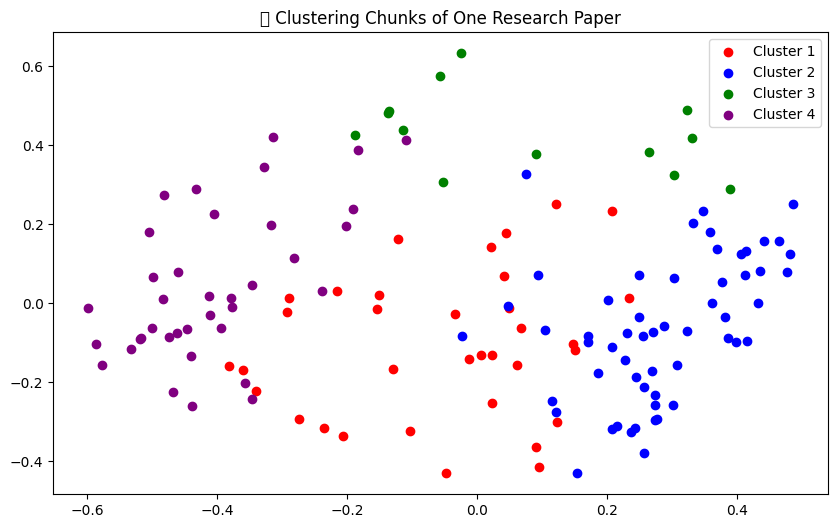

In [47]:

# ✅ STEP 8: Visualize using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']
for i in range(num_clusters):
    cluster_points = reduced[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                color=colors[i % len(colors)], label=f"Cluster {i+1}")

plt.title("📊 Clustering Chunks of One Research Paper")
plt.legend()
plt.show()

In [48]:

def clean_text(text):
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# ✅ STEP 9: Print top 3 closest chunks (as paragraphs) for each cluster
print("\n📌 Top 3 representative chunks per cluster (paragraph style):\n" + "-"*60)
for i in range(num_clusters):
    cluster_indices = [j for j, label in enumerate(labels) if label == i]
    cluster_vectors = [embeddings[j] for j in cluster_indices]

    centroid = kmeans.cluster_centers_[i]
    distances = [np.linalg.norm(vec - centroid) for vec in cluster_vectors]

    # Get top 3 closest chunks
    top_3_indices = np.argsort(distances)[:3]

    print(f"\n🔹 Cluster {i+1}:\n")
    for idx in top_3_indices:
        paragraph = clean_text(chunks[cluster_indices[idx]])
        print(paragraph + "\n")



📌 Top 3 representative chunks per cluster (paragraph style):
------------------------------------------------------------

🔹 Cluster 1:

Species Classification: Few-Shot Learning Model This project utilizes a Few-Shot Learning (FSL) approach to overcome the challenges of limited labeled data in Omani wildlife datasets. Few-Shot Learning is designed to mimic real-world scenarios where models must generalize to unseen classes with only a small number of labeled examples. To achieve this, three approaches were implemented: the Prototypical Network Approach, the Relation Network Approach, and the Siamese-Based Few-Shot Learning Approach. All methods operate within an episodic training setup, where each episode splits the data into a support set (a few labeled examples) and a query set (unlabeled samples from the same classes). For feature extraction, a pre-trained ResNet backbone trained on the ImageNet dataset was employed.

As there was no previous work on Omani wildlife species, the pr

In [50]:

# ✅ STEP 3: Load FLAN-T5 model (small for speed, or use 'base', 'large', etc.)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name = "google/flan-t5-base"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

# ✅ STEP 4: Define summarization function (3 sentences max)
def summarize(text, max_input_tokens=512, max_output_tokens=1000):
    prompt = (
        "You are an expert researcher skilled in summarizing complex scientific texts. "
        "Please provide a detailed and comprehensive summary of the following text. "
        "Your summary should capture the key concepts, methodologies, results, and conclusions "
        "in a clear and precise manner.\n\n"
        + text[:tokenizer.model_max_length]
    )

    inputs = tokenizer(
        prompt,
        return_tensors="pt",
        max_length=max_input_tokens,
        truncation=True
    ).to(device)

    summary_ids = model.generate(
        inputs["input_ids"],
        max_length=max_output_tokens,
        num_beams=4,
        early_stopping=True
    )

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)


    summary_lines = re.split(r'(?<=[.؟!])\s+', summary.strip())[:3]
    return "\n".join(summary_lines)

# ✅ STEP 5: Summarize each cluster
print("\n📚 Summarizing each cluster:\n" + "-"*40)
for i in range(num_clusters):
    cluster_chunks = [chunks[j] for j in range(len(chunks)) if labels[j] == i]
    cluster_text = " ".join(cluster_chunks)

    print(f"\n📦 Cluster {i+1} Summary:")
    print("📝\n" + summarize(cluster_text))



📚 Summarizing each cluster:
----------------------------------------

📦 Cluster 1 Summary:
📝
Few-Shot Learning (FSL) for classification and identification of species living in Omani reserves.

📦 Cluster 2 Summary:
📝
A report submitted in partial fulfillment of the requirements for the B.Sc.
in Computer Science.

📦 Cluster 3 Summary:
📝
We extend our gratitude to everyone who contributed to the success of this work, beginning with our dedicated team and its supervisor.
Our thanks also go to Ankaa Innovation Company for their invaluable support.
Additionally, we are grateful to the Computer Science Department and all our colleagues.

📦 Cluster 4 Summary:
📝
In the Literature Review phase, Malak focused on MegaDetector and Transfer Learning Techniques, Iman focused on Few-Shot Learning Techniques.
